In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
import sys

import os, sys

%matplotlib inline

In [2]:
from box import Box
import glob

In [3]:
TOP = os.getcwd().replace("notebooks/tt", "")
D1 = TOP + 'data/'
figures_dir = TOP + 'manuscript/figures/'

In [4]:
import glob
import openpyxl
import seaborn as sns

In [5]:
file_list = glob.glob(D1 + "/*150823*.xlsx") # Include slash or it will search in the wrong directory!!

In [6]:
file_list

['/home/grace/Documents/python/ml-tox/data/liver_unbalanced_all_featuresel_150823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/TK_under_all_featsel_150823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/NM_under_all_featsel_150823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/random_under_all_featsel_150823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/ENN_under_all_featsel_150823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/SMOTE_over_all_featsel_150823.xlsx',
 '/home/grace/Documents/python/ml-tox/data/CNN_under_all_feat_150823.xlsx']

In [7]:
mylst = []
for f in file_list:
    mylst.append(pd.read_excel(f))

In [8]:
df = pd.concat(mylst)

In [9]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [10]:
df

,tox,classifier,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision,dt,balance,sampling
0,chr_liver,ANN1,0.784,0.010,0.993,0.023,0.005,0.018,0.645,0.012,0.648,0.007,mrgn,unbalanced,unbalanced
1,chr_liver,GenRA,0.727,0.056,0.791,0.127,0.313,0.163,0.624,0.050,0.682,0.034,mrgn,unbalanced,unbalanced
2,chr_liver,Gradient Boosting,0.724,0.048,0.792,0.102,0.279,0.154,0.612,0.057,0.672,0.043,mrgn,unbalanced,unbalanced
3,chr_liver,KNN,0.722,0.064,0.776,0.144,0.341,0.181,0.624,0.051,0.689,0.035,mrgn,unbalanced,unbalanced
4,chr_liver,LR,0.736,0.043,0.816,0.103,0.276,0.152,0.626,0.047,0.677,0.036,mrgn,unbalanced,unbalanced
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,dev_liver,KNN,0.058,0.103,0.042,0.075,0.964,0.043,0.813,0.033,0.102,0.210,cba,CNN,under
76,dev_liver,LR,0.111,0.131,0.102,0.125,0.909,0.084,0.777,0.061,0.136,0.162,cba,CNN,under
77,dev_liver,NB,0.149,0.120,0.126,0.104,0.907,0.042,0.779,0.035,0.202,0.181,cba,CNN,under
78,dev_liver,Random Forest,0.143,0.127,0.141,0.136,0.882,0.049,0.761,0.033,0.151,0.126,cba,CNN,under


In [11]:
df[(df['tox'] == 'chr_liver') & (df['sampling'] == 'unbalanced')].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.735050,0.038675,0.798975,0.080825,0.335875,0.120100,0.636325,0.039175,0.695375,0.031075
std,0.039279,0.015504,0.110493,0.028268,0.166112,0.043583,0.022240,0.011666,0.028489,0.010369
min,0.636000,0.010000,0.548000,0.023000,0.005000,0.018000,0.596000,0.012000,0.648000,0.007000
25%,0.721750,0.030500,0.757250,0.059750,0.242750,0.094500,0.624000,0.031750,0.675500,0.025750
50%,0.735000,0.038500,0.784500,0.084000,0.359000,0.119000,0.636500,0.038000,0.690500,0.031500
75%,0.767250,0.048000,0.848750,0.100500,0.425250,0.152500,0.652500,0.047500,0.711250,0.037000
max,0.788000,0.075000,0.993000,0.144000,0.694000,0.193000,0.684000,0.060000,0.769000,0.050000


In [12]:
df[(df['tox'] == 'dev_liver') & (df['sampling'] == 'unbalanced')].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000
mean,0.040500,0.058400,0.039200,0.050300,0.954625,0.029175,0.80320,0.026100,0.061750,0.113825
std,0.053163,0.047577,0.078972,0.054158,0.071962,0.024474,0.04754,0.016582,0.059934,0.092408
min,0.000000,0.000000,0.000000,0.000000,0.555000,0.000000,0.54200,0.009000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.938000,0.007500,0.79200,0.010750,0.000000,0.000000
50%,0.017500,0.057000,0.013000,0.041000,0.971500,0.030000,0.81300,0.026500,0.052000,0.135000
75%,0.052500,0.096250,0.040500,0.071250,0.998000,0.040750,0.82725,0.033500,0.102750,0.170000
max,0.249000,0.133000,0.475000,0.272000,1.000000,0.130000,0.83600,0.100000,0.196000,0.309000


In [13]:
df[(df['tox'] == 'chr_liver') & (df['sampling'] == 'under')].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,0.614080,0.077615,0.562985,0.108235,0.604490,0.124005,0.577860,0.04941,0.729160,0.059800
std,0.102593,0.039693,0.153076,0.040669,0.165264,0.047607,0.048564,0.01245,0.057889,0.053097
min,0.038000,0.010000,0.023000,0.024000,0.006000,0.017000,0.362000,0.01300,0.212000,0.007000
25%,0.560750,0.051000,0.477000,0.077750,0.568000,0.087750,0.546750,0.04200,0.714000,0.038000
50%,0.631500,0.070000,0.553500,0.101500,0.640500,0.113000,0.584500,0.04800,0.739000,0.047500
75%,0.668000,0.092000,0.615000,0.126000,0.689750,0.157250,0.606500,0.05600,0.757000,0.062000
max,0.787000,0.200000,0.991000,0.217000,0.988000,0.259000,0.687000,0.08700,0.825000,0.393000


In [14]:
df[(df['tox'] == 'dev_liver') & (df['sampling'] == 'under')].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.130220,0.092140,0.212070,0.175040,0.792565,0.134490,0.696725,0.094560,0.125295,0.115480
std,0.085879,0.036814,0.187254,0.107934,0.174337,0.104142,0.115171,0.067978,0.068117,0.072659
min,0.000000,0.000000,0.000000,0.000000,0.387000,0.000000,0.426000,0.009000,0.000000,0.000000
25%,0.052250,0.080000,0.054250,0.091000,0.695500,0.048750,0.628250,0.038000,0.080500,0.070500
50%,0.137500,0.101000,0.165500,0.166000,0.843500,0.104000,0.732000,0.071500,0.143000,0.105000
75%,0.200500,0.119000,0.317750,0.267500,0.926750,0.234500,0.785250,0.160250,0.174250,0.157000
max,0.290000,0.160000,0.678000,0.460000,1.000000,0.455000,0.836000,0.306000,0.324000,0.390000


In [15]:
df[(df['tox'] == 'chr_liver') & (df['sampling'] == 'over')].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.654050,0.063150,0.603950,0.105150,0.589875,0.125575,0.599425,0.046550,0.737125,0.043850
std,0.042705,0.014375,0.076926,0.027883,0.081338,0.045849,0.027935,0.007383,0.019095,0.012917
min,0.584000,0.033000,0.487000,0.059000,0.425000,0.064000,0.560000,0.028000,0.693000,0.025000
25%,0.627000,0.054750,0.555000,0.087750,0.534750,0.082000,0.580750,0.042750,0.727750,0.033750
50%,0.652000,0.065500,0.599000,0.101000,0.609500,0.118000,0.595000,0.048500,0.741000,0.042000
75%,0.665500,0.072000,0.636250,0.120750,0.649250,0.150000,0.605750,0.051250,0.747500,0.052250
max,0.758000,0.097000,0.790000,0.181000,0.719000,0.242000,0.677000,0.060000,0.773000,0.073000


In [16]:
df[(df['tox'] == 'dev_liver') & (df['sampling'] == 'over')].describe()

,mean_f1,std_f1,mean_sensitivity,std_sensitivity,mean_specificity,std_specificity,mean_accuracy,std_accuracy,mean_precision,std_precision
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.194225,0.089925,0.318900,0.184625,0.679750,0.134950,0.620500,0.096750,0.160275,0.082925
std,0.051068,0.018878,0.154273,0.064899,0.149317,0.074875,0.100443,0.050027,0.029420,0.032302
min,0.045000,0.041000,0.038000,0.077000,0.432000,0.046000,0.465000,0.037000,0.067000,0.036000
25%,0.161500,0.078750,0.194750,0.124500,0.545500,0.066750,0.528000,0.053000,0.150750,0.060500
50%,0.207000,0.088000,0.301000,0.180500,0.684500,0.113500,0.619000,0.081500,0.164500,0.072500
75%,0.226750,0.101250,0.453750,0.225250,0.806500,0.190750,0.696000,0.132250,0.174750,0.096250
max,0.270000,0.122000,0.622000,0.310000,0.913000,0.303000,0.775000,0.212000,0.234000,0.168000


In [17]:
df_melt = df.melt(id_vars = ['tox', 'classifier', 'dt', 'sampling'], value_vars = ['mean_f1', 'mean_sensitivity', 'mean_specificity', 'mean_precision'], var_name = 'perf')

In [18]:
df_melt

,tox,classifier,dt,sampling,perf,value
0,chr_liver,ANN1,mrgn,unbalanced,mean_f1,0.784
1,chr_liver,GenRA,mrgn,unbalanced,mean_f1,0.727
2,chr_liver,Gradient Boosting,mrgn,unbalanced,mean_f1,0.724
3,chr_liver,KNN,mrgn,unbalanced,mean_f1,0.722
4,chr_liver,LR,mrgn,unbalanced,mean_f1,0.736
...,...,...,...,...,...,...
2235,dev_liver,KNN,cba,under,mean_precision,0.102
2236,dev_liver,LR,cba,under,mean_precision,0.136
2237,dev_liver,NB,cba,under,mean_precision,0.202
2238,dev_liver,Random Forest,cba,under,mean_precision,0.151


In [19]:
toxs1 = ['chr_liver']*3+['dev_liver']*3
sts = ['over', 'unbalanced', 'under']*2

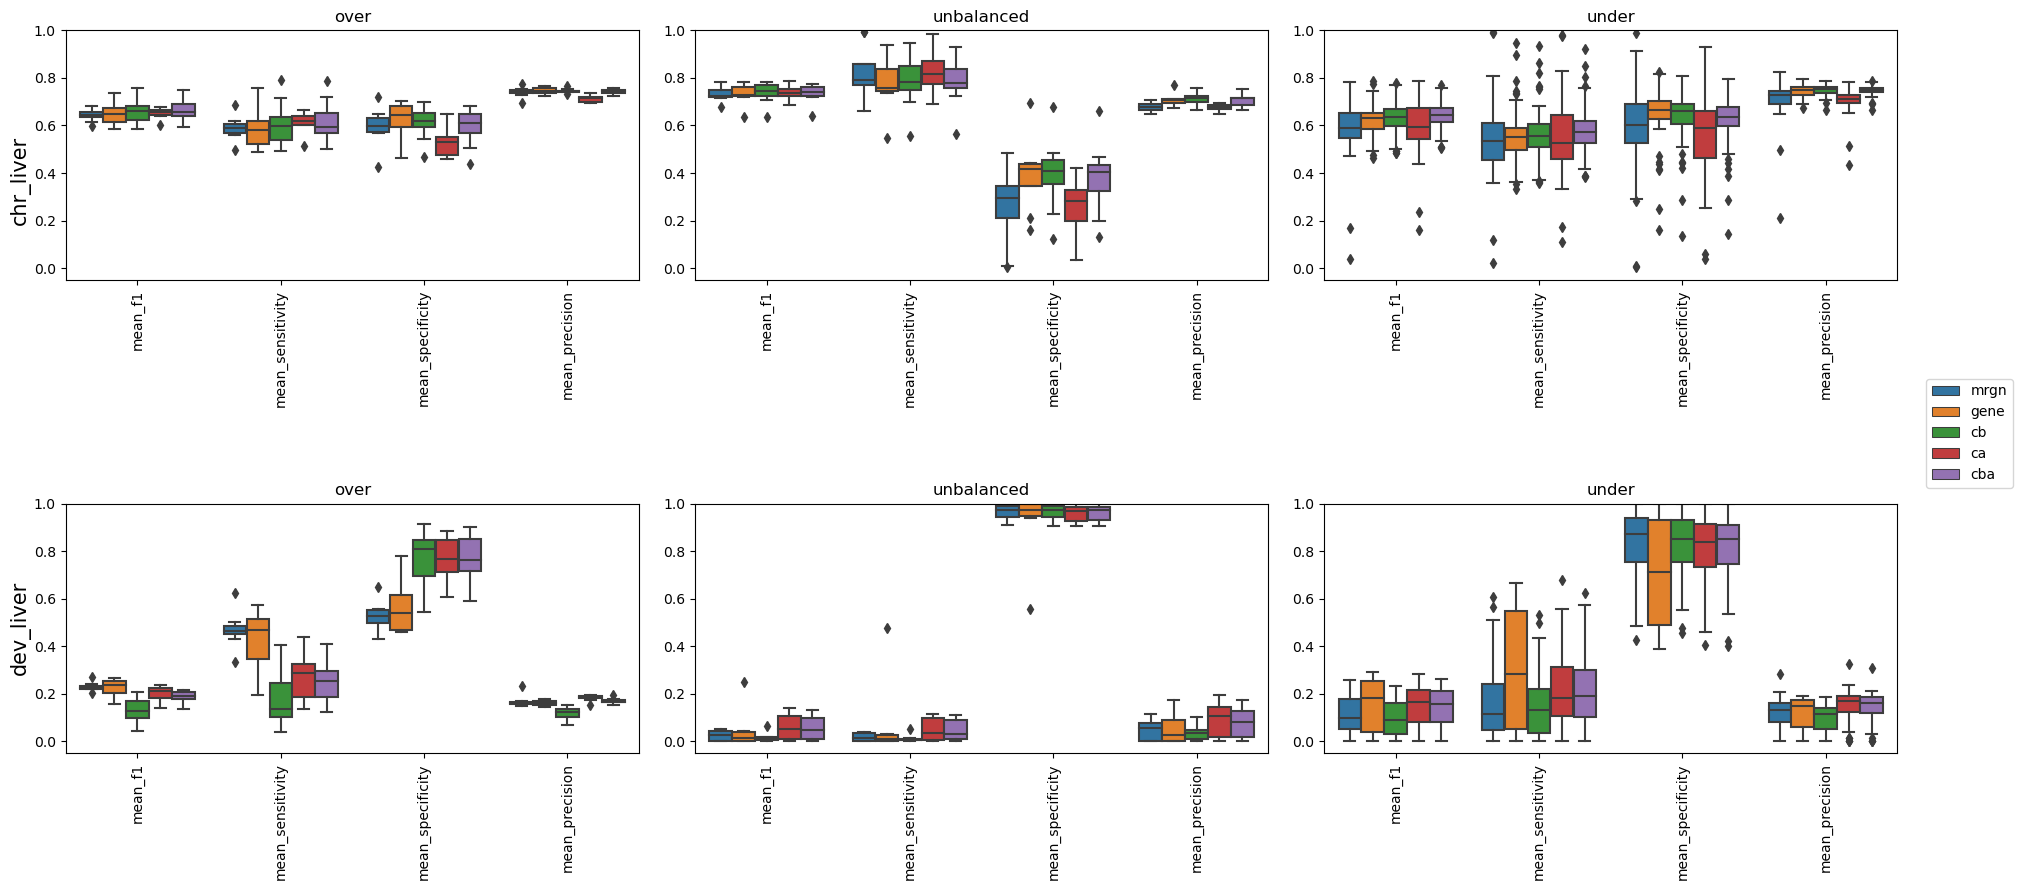

In [20]:
fig = plt.figure(figsize = (20,9))

for c,e, num in zip(sts, toxs1, range(1,7)):
    df0=df_melt[(df_melt['sampling'] == c) & (df_melt['tox'] == e)]
    ax = fig.add_subplot(2,3,num)
    sns.boxplot(x = 'perf', y = 'value', hue = 'dt', data = df0)
    ax.set_title(c)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,1)
    ax.get_legend().remove()
    
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)
plt.subplots_adjust(bottom=0.5, right=0.5, top=0.9)
fig.text(0,0.75, "chr_liver", fontsize = 15, rotation = 'vertical')
fig.text(0,0.25, "dev_liver", fontsize = 15,rotation = 'vertical')
#fig.suptitle("chr_liver (a) and dev_liver (b)", fontsize = 14, )
plt.tight_layout()
plt.show()
fig.savefig(figures_dir+'Figure9.png', dpi = 300)

In [21]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [22]:
anova_res = {}
for e in df.sampling.unique():
    model = ols('mean_f1 ~ C(dt)', data=df[(df['sampling']== e) &  (df['tox'] == 'chr_liver') ] ).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    anova_res[e] = aov_table

In [23]:
anova_res['unbalanced']

,sum_sq,df,F,PR(>F)
C(dt),0.00024,4.0,0.03499,0.997542
Residual,0.05993,35.0,NaN,NaN


In [24]:
anova_res['over']

,sum_sq,df,F,PR(>F)
C(dt),0.002746,4.0,0.351402,0.841267
Residual,0.068380,35.0,NaN,NaN


In [25]:
anova_res['under']

,sum_sq,df,F,PR(>F)
C(dt),0.096974,4.0,2.366609,0.054225
Residual,1.997584,195.0,NaN,NaN


In [26]:
anova_res1 = {}
for e in df.sampling.unique():
    model = ols('mean_f1 ~ C(dt)', data=df[(df['sampling']== e) &  (df['tox'] == 'dev_liver') ] ).fit()
    aov_table = sm.stats.anova_lm(model, typ=2)
    anova_res1[e] = aov_table

In [27]:
anova_res1['unbalanced']

,sum_sq,df,F,PR(>F)
C(dt),0.011897,4.0,1.058724,0.39143
Residual,0.098327,35.0,NaN,NaN


In [28]:
anova_res1['over']

,sum_sq,df,F,PR(>F)
C(dt),0.050708,4.0,8.699684,0.000055
Residual,0.051001,35.0,NaN,NaN


In [29]:
anova_res1['under']

,sum_sq,df,F,PR(>F)
C(dt),0.102492,4.0,3.659927,0.006719
Residual,1.365185,195.0,NaN,NaN


In [32]:
df_melt[(df_melt['tox'] == 'chr_liver') & (df_melt['sampling'] == 'under')].groupby(['dt', 'perf']).mean()

value
dt   perf                      
ca   mean_f1           0.591400
     mean_precision    0.699825
     mean_sensitivity  0.557625
     mean_specificity  0.558375
cb   mean_f1           0.631975
     mean_precision    0.749200
     mean_sensitivity  0.570300
     mean_specificity  0.631725
cba  mean_f1           0.640300
     mean_precision    0.746025
     mean_sensitivity  0.583375
     mean_specificity  0.617225
gene mean_f1           0.621700
     mean_precision    0.744650
     mean_sensitivity  0.556075
     mean_specificity  0.637125
mrgn mean_f1           0.585025
     mean_precision    0.706100
     mean_sensitivity  0.547550
     mean_specificity  0.578000

In [33]:
df_melt[(df_melt['tox'] == 'dev_liver') & (df_melt['sampling'] == 'over')].groupby(['dt', 'perf']).mean()

value
dt   perf                      
ca   mean_f1           0.202125
     mean_precision    0.182875
     mean_sensitivity  0.275750
     mean_specificity  0.763000
cb   mean_f1           0.129375
     mean_precision    0.118500
     mean_sensitivity  0.177500
     mean_specificity  0.768250
cba  mean_f1           0.187750
     mean_precision    0.170000
     mean_sensitivity  0.252750
     mean_specificity  0.766000
gene mean_f1           0.223000
     mean_precision    0.161125
     mean_sensitivity  0.418500
     mean_specificity  0.573625
mrgn mean_f1           0.228875
     mean_precision    0.168875
     mean_sensitivity  0.470000
     mean_specificity  0.527875

In [34]:
mylst2 = []
for f in file_list:
    mylst2.append(pd.read_excel(f, sheet_name = 'raw'))

In [35]:
len(mylst2)

7

In [36]:
raw_df = pd.concat(mylst2)

In [59]:
raw_df.columns

Index(['tox', 'classifier', 'kfeats', 'fit_time', 'score_time',
       'test_accuracy', 'test_f1', 'test_sensitivity', 'test_specificity',
       'test_precision', 'dt', 'balance', 'sampling'],
      dtype='object')

In [38]:
raw_df = raw_df.drop(['Unnamed: 0'], axis = 1)

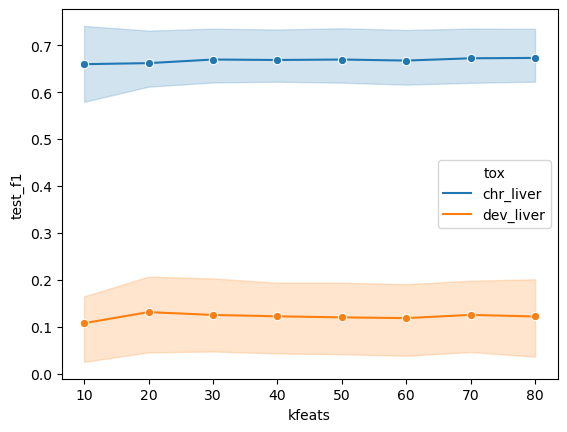

In [55]:
sns.lineplot(data = raw_df.groupby(['tox', 'kfeats', 'sampling']).mean().reset_index(), x = 'kfeats', y = 'test_f1', hue = 'tox', marker = 'o')
plt.savefig(figures_dir+'Figure10.png', dpi = 300)

In [63]:
raw_melt = raw_df.melt(id_vars = ['tox', 'classifier', 'dt', 'kfeats','sampling'], value_vars = [ 'test_f1', 'test_sensitivity', 'test_specificity',
       'test_precision'], var_name = 'perf')

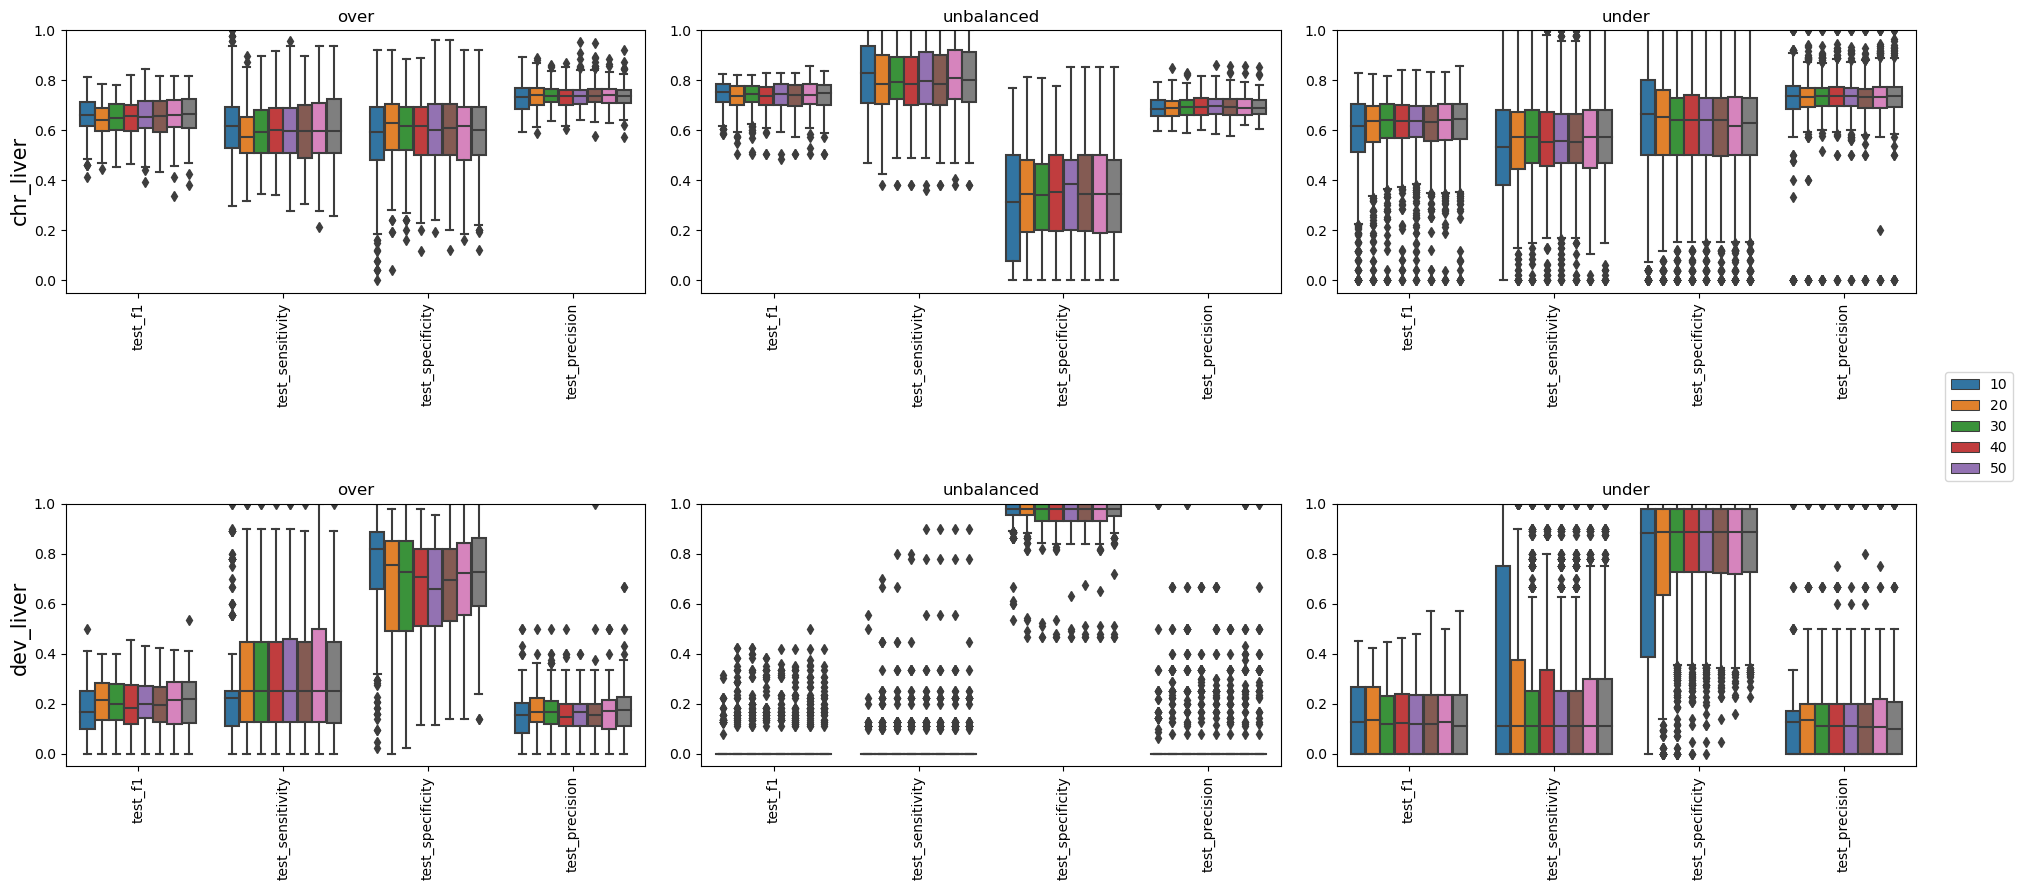

In [70]:
fig = plt.figure(figsize = (20,9))

for c,e, num in zip(sts, toxs1, range(1,7)):
    df0=raw_melt[(raw_melt['sampling'] == c) & (raw_melt['tox'] == e) ]
    ax = fig.add_subplot(2,3,num)
    sns.boxplot(x = 'perf', y = 'value', hue = 'kfeats', data = df0)
    ax.set_title(c)
    for xlab in ax.get_xticklabels():xlab.set_rotation(90)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(-0.05,1)
    ax.get_legend().remove()
    
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:5], labels[0:5], bbox_to_anchor=(1.05, 1.5), loc=2, borderaxespad=0.)
plt.subplots_adjust(bottom=0.5, right=0.5, top=0.9)
fig.text(0,0.75, "chr_liver", fontsize = 15, rotation = 'vertical')
fig.text(0,0.25, "dev_liver", fontsize = 15,rotation = 'vertical')
#fig.suptitle("chr_liver (a) and dev_liver (b)", fontsize = 14, )
plt.tight_layout()
plt.show()